In [9]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import psycopg2

In [10]:
#Connect to pgAdmin and fet Customer_churn table 
connection=psycopg2.connect(host="localhost", 
                            dbname="Customer_Churn",
                            user="postgres",
                           password="Carolina#92")
cur=connection.cursor()
cur.execute("select * from Customer_churn ")
all=cur.fetchall()
cur.close()

In [12]:
#Transform database into dataframe 
column_names=["city", "gender", "registered_via", "registered_on","date_streamed","less_than_25","less_than_50","less_than_75","less_than_985","above_985","unique_songs","total_secs","payment_method_id","payment_plan_days","plan_list_price","actual_amount_paid","auto_renewed","transaction_date","membership_expire_date","cancelled","is_churn"]
customer_churn_df.head()
customer_churn_df=pd.DataFrame(all, columns=column_names)
customer_churn_df.head()

,city,gender,registered_via,registered_on,date_streamed,less_than_25,less_than_50,less_than_75,less_than_985,above_985,...,total_secs,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,auto_renewed,transaction_date,membership_expire_date,cancelled,is_churn
0,4,male,7,20141023,20170328,0,1,1,0,5,...,1482.930,41,30,99,99,1,20170315,20170418,0,0
1,5,female,7,20130122,20170309,10,0,0,0,7,...,1741.500,41,30,149,149,1,20170311,20170411,0,0
2,5,female,7,20130122,20170323,7,5,1,2,23,...,7071.680,41,30,149,149,1,20170311,20170411,0,0
3,5,female,7,20130122,20170312,0,0,0,0,1,...,215.144,41,30,149,149,1,20170311,20170411,0,0
4,5,female,7,20130122,20170317,11,2,4,2,65,...,16731.000,41,30,149,149,1,20170311,20170411,0,0


In [16]:
# Use get_dummies() to convert categorical variables.
customer_churn_dummies= pd.get_dummies(customer_churn_df,columns=["gender","cancelled","auto_renewed","payment_method_id"])
customer_churn_dummies

,city,registered_via,registered_on,date_streamed,less_than_25,less_than_50,less_than_75,less_than_985,above_985,unique_songs,...,payment_method_id_34,payment_method_id_35,payment_method_id_36,payment_method_id_37,payment_method_id_38,payment_method_id_39,payment_method_id_40,payment_method_id_41,payment_method_id_6,payment_method_id_8
0,4,7,20141023,20170328,0,1,1,0,5,5,...,0,0,0,0,0,0,0,1,0,0
1,5,7,20130122,20170309,10,0,0,0,7,16,...,0,0,0,0,0,0,0,1,0,0
2,5,7,20130122,20170323,7,5,1,2,23,25,...,0,0,0,0,0,0,0,1,0,0
3,5,7,20130122,20170312,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,5,7,20130122,20170317,11,2,4,2,65,83,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8762702,13,7,20100924,20170316,15,2,0,3,44,36,...,0,0,0,0,0,0,0,1,0,0
8762703,13,7,20100924,20170324,0,0,1,0,38,30,...,0,0,0,0,0,0,0,1,0,0
8762704,13,7,20100924,20170327,8,3,1,2,20,34,...,0,0,0,0,0,0,0,1,0,0
8762705,13,7,20100924,20170312,1,2,0,0,14,13,...,0,0,0,0,0,0,0,1,0,0


In [17]:
#Create variables for modeling
y=customer_churn_dummies['is_churn'].values
X=customer_churn_dummies.drop(columns = ['is_churn'])



In [ ]:
#Standardize the data with MinMaxScaler()
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
#Create Train & dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

AxesSubplot(0.125,0.125;0.775x0.755)


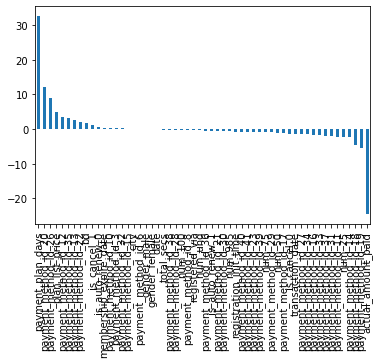

In [15]:
# Understand the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False).plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


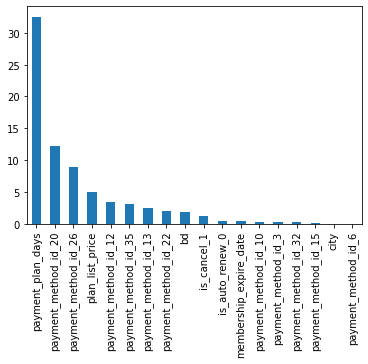

In [16]:
#Positive realtions of weight ( Increasing the probability of Churn)
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:18].plot(kind='bar'))

In [2]:
#Negative realtions of weight ( Decreasing the probability of Churn)
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[25:].plot(kind='bar'))

NameError: name 'pd' is not defined

In [1]:
#Elbow curve to define the best number of kplots 
from sklearn.cluster import KMeans
inertia=[]
k=list(range(1,8))

# Looking for the best K
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(customer_churn_dummies)
inertia.append(km.inertia_)

NameError: name 'customer_churn_dummies' is not defined

In [ ]:
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

In [ ]:
def get_clusters(k, data):
   # Create a copy of the DataFrame
   data = data.copy()

   # Initialize the K-Means model
   model = KMeans(n_clusters=k, random_state=0)

   # Fit the model
   model.fit(data)

   # Predict clusters
   predictions = model.predict(data)

   # Create return DataFrame with predicted clusters
   data["class"] = model.labels_

   return data

In [ ]:
#Most important variable predictors of churn.
weights_forest = model_rf.feature_importances_
weights = pd.Series(weights_forest,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [ ]:
#Support Vecor Machine (SVM)
#Create train & dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
#Run SVM model
from sklearn.svm import SVC
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

In [ ]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  